In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
df = pd.read_csv('/content/Data_Source_Task5.csv', sep = ",")
df

,id_distributor,id_cabang,id_invoice,tanggal,id_customer,id_barang,jumlah_barang,unit,harga,mata_uang,brand_id,lini,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,TD,CAB01,IN5997,20/01/22,CUST55380,BRG0001,1.0,DUS,1169.91,IDR,BRND001,OGB & PH,NaN,NaN,NaN
1,TD,CAB01,IN6297,20/01/22,CUST55381,BRG0002,5.0,DUS,2337.50,IDR,BRND002,ETIKAL,NaN,Notes,NaN
2,TA,CAB02,IN6155,21/01/22,CUST55382,BRG0003,9.0,DUS,10690.60,IDR,BRND003,MARCKS,NaN,id_barang,BRG0001 - \nBRG0020
3,EPM,CAB03,IN6144,22/01/22,CUST55383,BRG0004,13.0,DUS,8700.70,IDR,BRND004,VNS,NaN,id_cabang,CAB01 - CAB010
4,TD,CAB04,IN6280,23/01/22,CUST55384,BRG0005,1.0,DUS,5648.30,IDR,BRND005,SLCYL,NaN,id_distributor,"TD, EPM, TA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Outlier

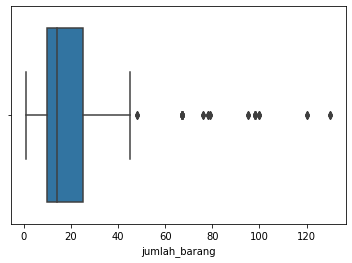

In [ ]:
plt.figure()
sns.boxplot(x=df["jumlah_barang"])
plt.show()

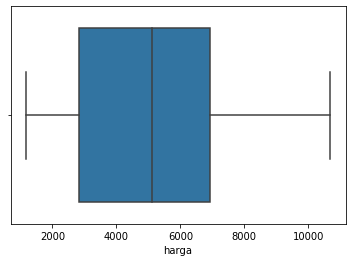

In [ ]:
plt.figure()
sns.boxplot(x=df["harga"])
plt.show()

In [ ]:
Q1 = (df["jumlah_barang"]).quantile(0.25)
Q3 = (df["jumlah_barang"]).quantile(0.75)

IQR = Q3 - Q1

minimum = Q1 - 1.5*IQR
maximum = Q3 + (1.5*IQR)

In [ ]:
minimum

-12.5

In [ ]:
maximum

47.5

In [ ]:
df["jumlah_barang"].mask(df["jumlah_barang"] > maximum, maximum, inplace = True)

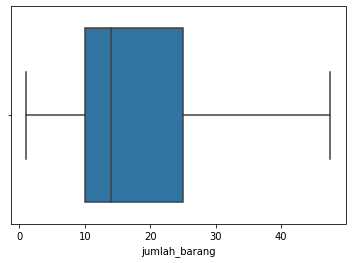

In [ ]:
plt.figure()
sns.boxplot(x=df["jumlah_barang"])
plt.show()

# Median price yang dibayar customer dari masing-masing unit barang. 

In [ ]:
median_price = df["harga"].groupby(df["unit"]).median()
print(median_price)


unit
DUS    5120.2
Name: harga, dtype: float64


Histogram Jumlah Barang

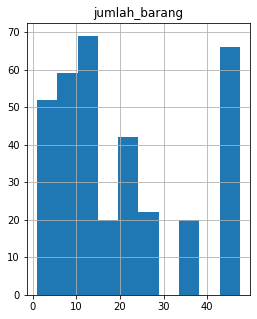

In [ ]:
df[["jumlah_barang"]].hist(figsize=(4, 5))
plt.show()


Histogram Harga

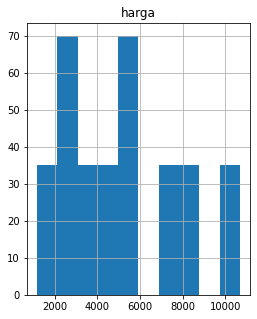

In [ ]:
df[["harga"]].hist(figsize=(4, 5))
plt.show()  


Rata rata harga per Lini

In [ ]:
rata = df["harga"].groupby(df["lini"]).mean()
print(rata)


lini
ETIKAL      3464.800
MARCKS      7341.250
OGB & PH    1994.555
SLCYL       6294.300
VNS         7240.700
Name: harga, dtype: float64


# Buat kolom order_month Januari



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_distributor  350 non-null    object 
 1   id_cabang       350 non-null    object 
 2   id_invoice      350 non-null    object 
 3   tanggal         350 non-null    object 
 4   id_customer     350 non-null    object 
 5   id_barang       350 non-null    object 
 6   jumlah_barang   350 non-null    float64
 7   unit            350 non-null    object 
 8   harga           350 non-null    float64
 9   mata_uang       350 non-null    object 
 10  brand_id        350 non-null    object 
 11  lini            350 non-null    object 
 12  Unnamed: 12     0 non-null      float64
 13  Unnamed: 13     6 non-null      object 
 14  Unnamed: 14     5 non-null      object 
dtypes: float64(3), object(12)
memory usage: 45.1+ KB


Menghitung Provit per customer pada bulan Januari

In [ ]:
# Buat kolom order_month
df['order_month'] = pd.to_datetime(df['tanggal']).dt.strftime('%m/%y')
print(df['order_month'])

0      01/22
1      01/22
2      01/22
3      01/22
4      01/22
       ...  
379      NaN
380      NaN
381      NaN
382      NaN
383      NaN
Name: order_month, Length: 384, dtype: object


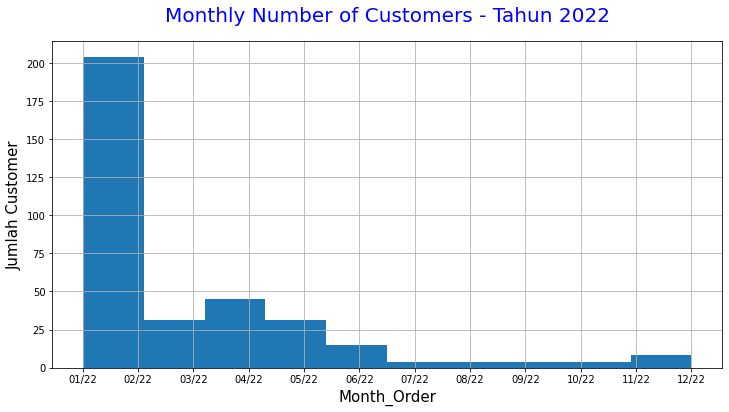

In [ ]:
df["order_month"].hist(figsize=(12, 6))
plt.title('Monthly Number of Customers - Tahun 2022', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Month_Order', fontsize=15)
plt.ylabel('Jumlah Customer', fontsize=15)
plt.show()  

In [ ]:
df['gmv'] = df['harga'] * df['jumlah_barang']
print(df['gmv'])

0        1169.91
1       11687.50
2       96215.40
3      113109.10
4        5648.30
         ...    
379          NaN
380          NaN
381          NaN
382          NaN
383          NaN
Name: gmv, Length: 384, dtype: float64


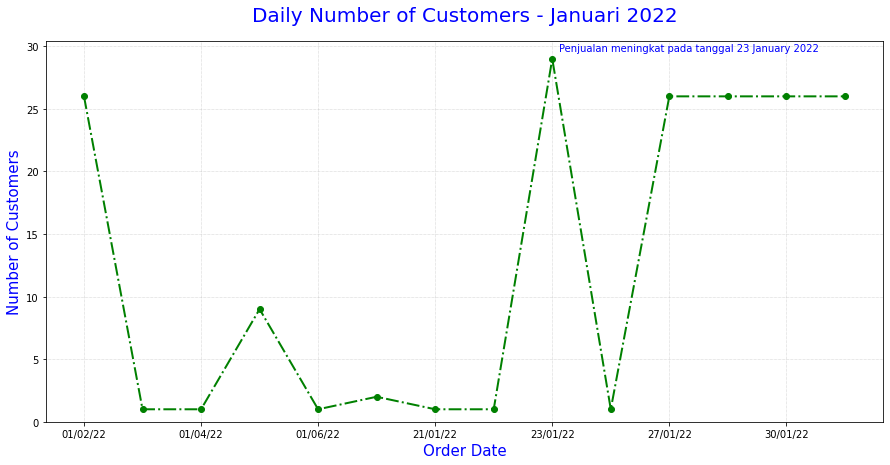

In [ ]:
fig=plt.figure(figsize=(15, 7))
df[df['order_month']=='01/22'].groupby(['tanggal'])['id_customer'].nunique().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Daily Number of Customers - Januari 2022', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.text(0.6, 0.86,'Penjualan meningkat pada tanggal 23 January 2022', transform=fig.transFigure, color='blue')
plt.show()


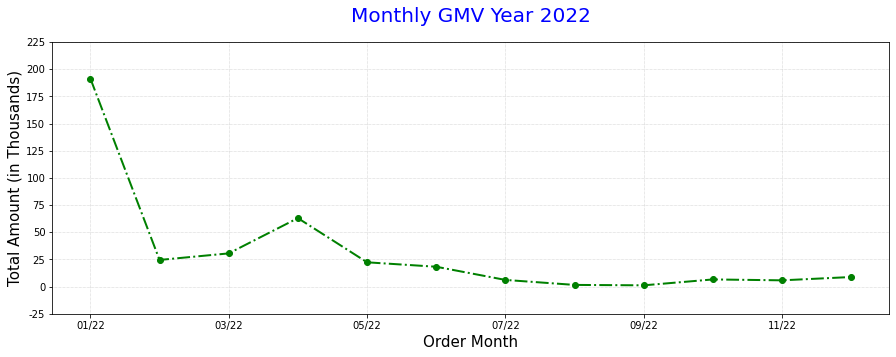

In [ ]:
fig=plt.figure(figsize=(15, 5))
df.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2022', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Thousands)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/100000).astype(int))
plt.show()


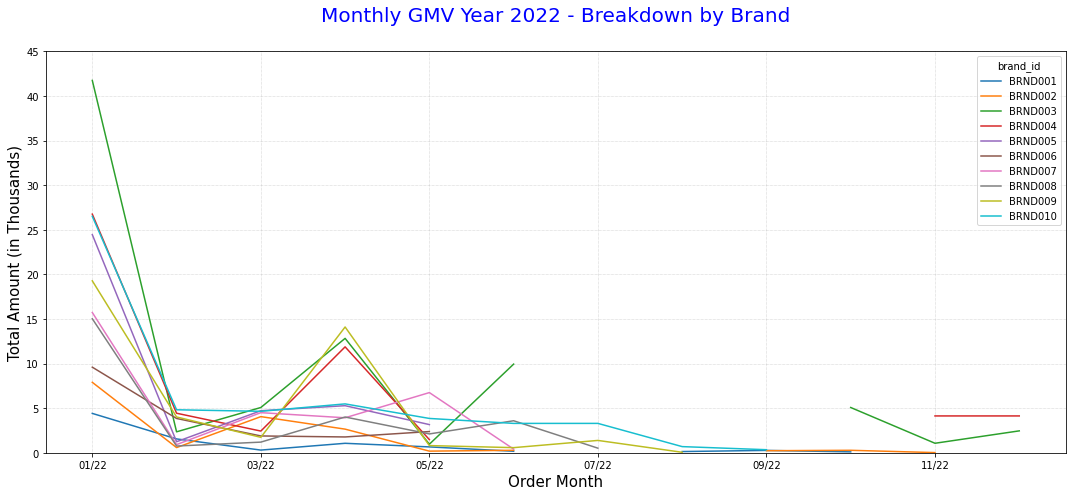

In [ ]:
df.groupby(['order_month','brand_id'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2022 - Breakdown by Brand',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Thousands)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/100000).astype(int))
plt.gcf().set_size_inches(15, 7)
plt.tight_layout()
plt.show()


In [ ]:
# Buat variabel untuk 5 brand dengan GMV tertinggi
top_brands = (df.groupby('brand_id')['gmv']
.sum()
.reset_index()
.sort_values(by='gmv',ascending=False)
.head(5))
print(top_brands)


  brand_id        gmv
2  BRND003  8151582.5
3  BRND004  5620652.2
9  BRND010  5295448.9
8  BRND009  4393332.0
4  BRND005  3982051.5


In [ ]:
# Buat satu kolom lagi di dataset dengan nama Brand_top
df['brand_top'] = df['brand_id'].apply(lambda x: x if (x in top_brands['brand_id'].to_list()) else 'other')


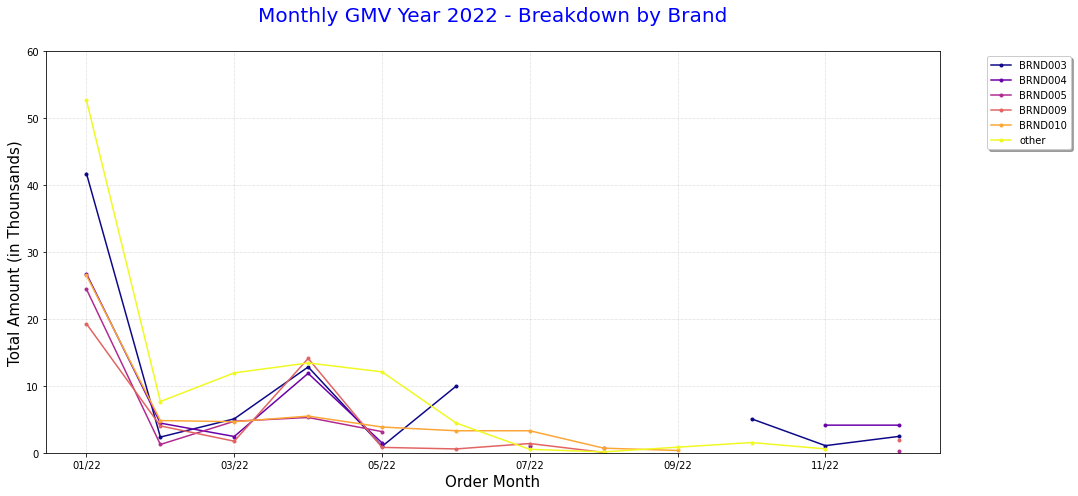

In [ ]:
# Plot multi-line chartnya
import matplotlib.pyplot as plt
df.groupby(['order_month','brand_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2022 - Breakdown by Brand',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Thounsands)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/100000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(15, 7)
plt.tight_layout()
plt.show()


In [ ]:
# Buat variabel untuk 5 cabang dengan GMV tertinggi
top_cabang = (df.groupby('id_cabang')['gmv']
.sum()
.reset_index()
.sort_values(by='gmv',ascending=False)
.head(5))
print(top_cabang)


  id_cabang           gmv
0     CAB01  1.165786e+07
1     CAB02  6.596763e+06
5     CAB06  4.473721e+06
2     CAB03  3.661229e+06
6     CAB07  3.533911e+06


In [ ]:
# Buat satu kolom lagi di dataset dengan nama cabang_top
df['cabang_top'] = df['id_cabang'].apply(lambda x: x if (x in top_cabang['id_cabang'].to_list()) else 'other')


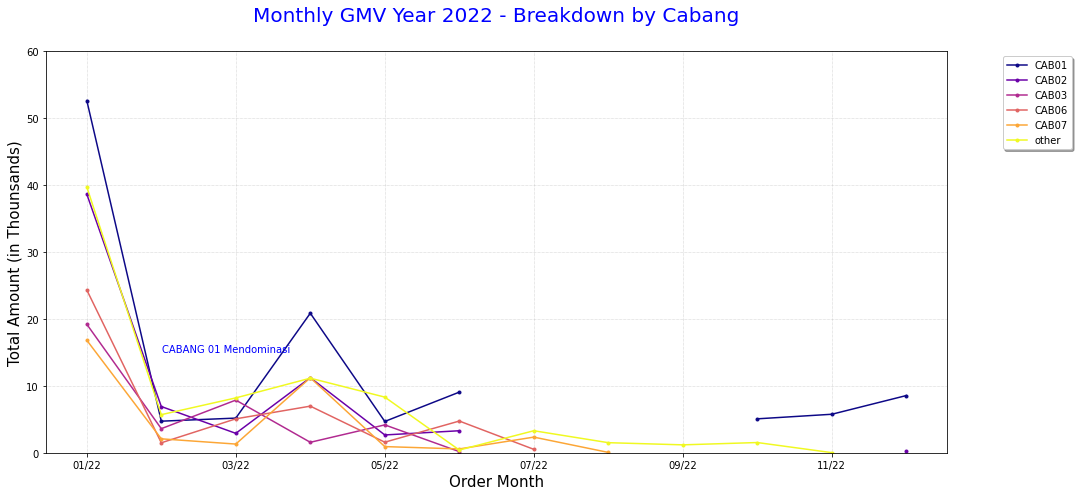

In [ ]:
# Plot multi-line chartnya
import matplotlib.pyplot as plt
df.groupby(['order_month','cabang_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2022 - Breakdown by Cabang',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Thounsands)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/100000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(15, 7)
plt.tight_layout()
plt.text(0.15, 0.4,'CABANG 01 Mendominasi', transform=fig.transFigure, color='blue')
plt.show()

In [ ]:
df_cab01 = df[(df['id_cabang']=='CAB01') & (df['order_month'] == '01/22')]
print(df_cab01.head())

   id_distributor id_cabang id_invoice   tanggal id_customer id_barang  \
0              TD     CAB01     IN5997  20/01/22   CUST55380   BRG0001   
1              TD     CAB01     IN6297  20/01/22   CUST55381   BRG0002   
11             TD     CAB01     IN6287  30/01/22   CUST55391   BRG0002   
12             TA     CAB01     IN6102  31/01/22   CUST55392   BRG0003   
22             TA     CAB01     IN6125  23/01/22   CUST55402   BRG0003   

    jumlah_barang unit     harga mata_uang brand_id      lini  Unnamed: 12  \
0             1.0  DUS   1169.91       IDR  BRND001  OGB & PH          NaN   
1             5.0  DUS   2337.50       IDR  BRND002    ETIKAL          NaN   
11           17.0  DUS   2337.50       IDR  BRND002    ETIKAL          NaN   
12           11.0  DUS  10690.60       IDR  BRND003    MARCKS          NaN   
22           14.0  DUS  10690.60       IDR  BRND003    MARCKS          NaN   

   Unnamed: 13 Unnamed: 14 order_month        gmv brand_top cabang_top  
0          Na

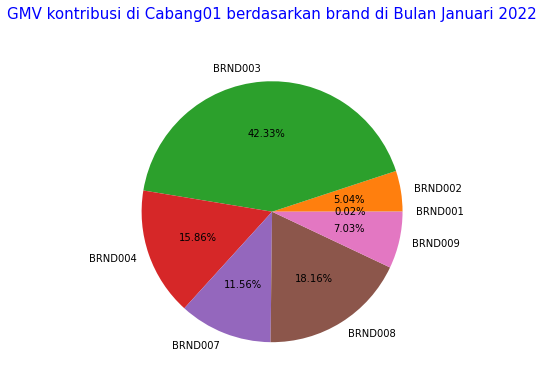

In [ ]:
gmv_df_cab01 = df_cab01.groupby('brand_id')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_df_cab01['gmv'], labels = gmv_df_cab01['brand_id'], autopct='%1.2f%%')
plt.title('GMV kontribusi di Cabang01 berdasarkan brand di Bulan Januari 2022', loc='center', pad=30, fontsize=15, color='blue')
plt.show()


In [ ]:
print(gmv_df_cab01.sort_values(by='gmv', ascending=False))

  brand_id         gmv
2  BRND003  2228990.10
5  BRND008   956060.05
3  BRND004   835267.20
4  BRND007   608453.25
6  BRND009   369964.80
1  BRND002   265306.25
0  BRND001     1169.91


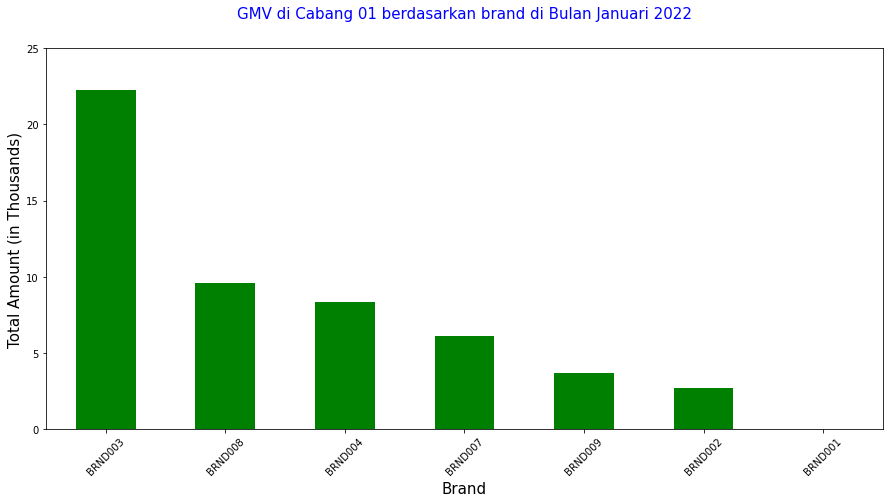

In [ ]:
plt.clf()
gmv_df_cab01.groupby('brand_id')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV di Cabang 01 berdasarkan brand di Bulan Januari 2022', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Total Amount (in Thousands)',fontsize = 15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/100000).astype(int))
plt.xticks(rotation=45)
plt.gcf().set_size_inches(15, 7)
plt.show()


In [ ]:
df_cab01_semuabulan = df[(df['id_cabang']=='CAB01')]
print(df_cab01_semuabulan.head())

   id_distributor id_cabang id_invoice   tanggal id_customer id_barang  \
0              TD     CAB01     IN5997  20/01/22   CUST55380   BRG0001   
1              TD     CAB01     IN6297  20/01/22   CUST55381   BRG0002   
11             TD     CAB01     IN6287  30/01/22   CUST55391   BRG0002   
12             TA     CAB01     IN6102  31/01/22   CUST55392   BRG0003   
22             TA     CAB01     IN6125  23/01/22   CUST55402   BRG0003   

    jumlah_barang unit     harga mata_uang brand_id      lini  Unnamed: 12  \
0             1.0  DUS   1169.91       IDR  BRND001  OGB & PH          NaN   
1             5.0  DUS   2337.50       IDR  BRND002    ETIKAL          NaN   
11           17.0  DUS   2337.50       IDR  BRND002    ETIKAL          NaN   
12           11.0  DUS  10690.60       IDR  BRND003    MARCKS          NaN   
22           14.0  DUS  10690.60       IDR  BRND003    MARCKS          NaN   

   Unnamed: 13 Unnamed: 14 order_month        gmv brand_top cabang_top  
0          Na

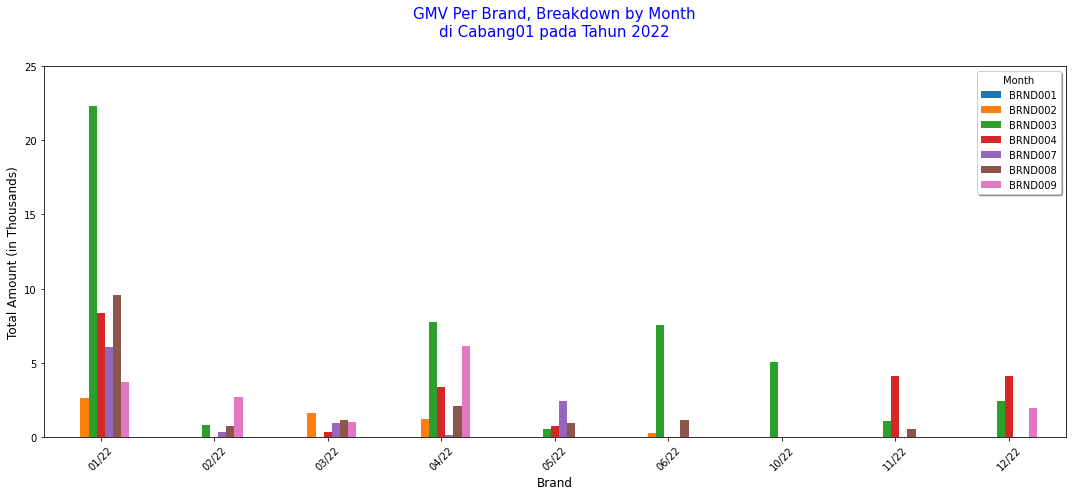

In [ ]:
df_cab01_semuabulan.groupby(['order_month','brand_id'])['gmv'].sum().unstack().plot(kind= 'bar')
plt.title('GMV Per Brand, Breakdown by Month\ndi Cabang01 pada Tahun 2022',loc= 'center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand',fontsize = 12)
plt.ylabel('Total Amount (in Thousands)',fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/100000).astype(int))
plt.xticks(rotation=45)
plt.gcf().set_size_inches(15, 7)
plt. tight_layout()
plt.show()


In [ ]:
#tabel penjualan di cabang 1 pada bulan januari
df_cab01

,id_distributor,id_cabang,id_invoice,tanggal,id_customer,id_barang,jumlah_barang,unit,harga,mata_uang,brand_id,lini,Unnamed: 12,Unnamed: 13,Unnamed: 14,order_month,gmv,brand_top,cabang_top
0,TD,CAB01,IN5997,20/01/22,CUST55380,BRG0001,1.0,DUS,1169.91,IDR,BRND001,OGB & PH,NaN,NaN,NaN,01/22,1169.91,other,CAB01
1,TD,CAB01,IN6297,20/01/22,CUST55381,BRG0002,5.0,DUS,2337.50,IDR,BRND002,ETIKAL,NaN,Notes,NaN,01/22,11687.50,other,CAB01
11,TD,CAB01,IN6287,30/01/22,CUST55391,BRG0002,17.0,DUS,2337.50,IDR,BRND002,ETIKAL,NaN,NaN,NaN,01/22,39737.50,other,CAB01
12,TA,CAB01,IN6102,31/01/22,CUST55392,BRG0003,11.0,DUS,10690.60,IDR,BRND003,MARCKS,NaN,NaN,NaN,01/22,117596.60,BRND003,CAB01
22,TA,CAB01,IN6125,23/01/22,CUST55402,BRG0003,14.0,DUS,10690.60,IDR,BRND003,MARCKS,NaN,NaN,NaN,01/22,149668.40,BRND003,CAB01
23,EPM,CAB01,IN6176,30/01/22,CUST55403,BRG0004,18.0,DUS,8700.70,IDR,BRND004,VNS,NaN,NaN,NaN,01/22,156612.60,BRND004,CAB01
26,EPM,CAB01,IN6173,27/01/22,CUST55406,BRG0001,12.0,DUS,4592.10,IDR,BRND007,ETIKAL,NaN,NaN,NaN,01/22,55105.20,other,CAB01
27,TD,CAB01,IN6013,28/01/22,CUST55407,BRG0002,25.0,DUS,3991.90,IDR,BRND008,MARCKS,NaN,NaN,NaN,01/22,99797.50,other,CAB01
37,TD,CAB01,IN6063,01/02/22,CUST55417,BRG0008,12.0,DUS,3991.90,IDR,BRND008,MARCKS,NaN,NaN,NaN,01/22,47902.80,other,CAB01
38,TD,CAB01,IN6131,27/01/22,CUST55418,BRG0009,10.0,DUS,5780.70,IDR,BRND009,VNS,NaN,NaN,NaN,01/22,57807.00,BRND009,CAB01


In [ ]:
#Agregat data per customer yaitu jumlah orders (banyaknya unique order_id), total quantity, dan total GMV.
#Lalu didapatkan 48 customers yang bertransaksi di Cabang 01 pada Bulan Januari 2022.
#Jika diurutkan dari jumlah gmv terbanyak, bisa dilihat bahwa customer_id CUST55452 
#telah melakukan 1 kali transaksi dengan jumlah quantity mencapai 47 barang, 
#dan GMV lebih dari 500.000! Luar biasa ya. 
#Customer-customer seperti ini harus tetap dijaga agar semakin loyal dengan produk. 

data_per_customer = (df_cab01.groupby('id_customer')
                                   .agg({'id_invoice':'nunique', 
                                         'jumlah_barang': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'id_invoice':'orders'}))
print(data_per_customer.sort_values(by='gmv',ascending=False))
print(data_per_customer.count())

   id_customer  orders  jumlah_barang        gmv
19   CUST55452       1           47.5  507803.50
13   CUST55433       1           45.0  391531.50
28   CUST55492       1           25.0  267265.00
20   CUST55462       1           22.0  235193.20
43   CUST55542       1           21.0  224502.60
38   CUST55526       1           47.5  218124.75
12   CUST55432       1           20.0  213812.00
40   CUST55537       1           47.5  189615.25
39   CUST55527       1           45.0  179635.50
15   CUST55437       1           44.0  175643.60
5    CUST55403       1           18.0  156612.60
14   CUST55436       1           34.0  156131.40
45   CUST55602       1           14.0  149668.40
4    CUST55402       1           14.0  149668.40
17   CUST55448       1           25.0  144517.50
29   CUST55493       1           14.0  121809.80
3    CUST55392       1           11.0  117596.60
42   CUST55541       1           47.5  111031.25
22   CUST55466       1           24.0  110210.40
36   CUST55522      

<Figure size 432x288 with 0 Axes>

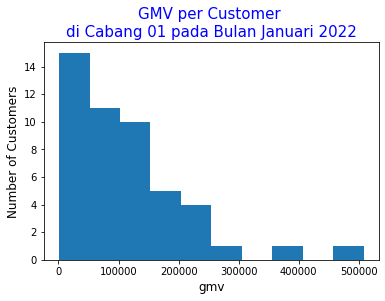

In [ ]:
plt.clf()
# Histogram pertama
plt.figure()
plt.hist(data_per_customer['gmv'])
plt.title('GMV per Customer \ndi Cabang 01 pada Bulan Januari 2022', fontsize=15, color='blue')
plt.xlabel('gmv',fontsize= 12)
plt.ylabel('Number of Customers',fontsize= 12)
plt.show()
#customer paling banyak mengeluarkan uang sejumlah 0-100.000

<Figure size 432x288 with 0 Axes>

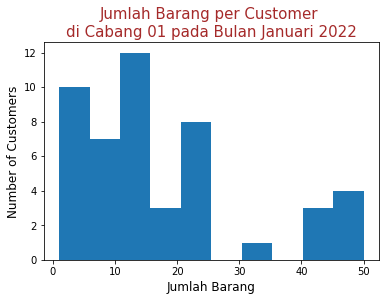

In [ ]:
plt.clf()
# Histogram pertama
plt.figure()
plt.hist(data_per_customer['jumlah_barang'],range=(1,50))
plt.title('Jumlah Barang per Customer \ndi Cabang 01 pada Bulan Januari 2022', fontsize=15, color='brown')
plt.xlabel('Jumlah Barang',fontsize= 12)
plt.ylabel('Number of Customers',fontsize= 12)
plt.show()
#customer paling banyak membeli diantara 0-15 barang

<Figure size 432x288 with 0 Axes>

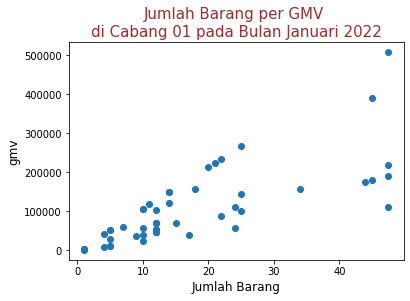

In [ ]:
plt.clf()
# Scatterplot pertama
plt.figure()
plt.scatter(data_per_customer['jumlah_barang'], data_per_customer['gmv'])
plt.title('Jumlah Barang per GMV \ndi Cabang 01 pada Bulan Januari 2022', fontsize=15, color='brown')
plt.xlabel('Jumlah Barang',fontsize= 12)
plt.ylabel('gmv',fontsize= 12)
plt.show()
#